In [6]:
#import the librairies

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as k
import numpy as np
import pandas as pd

In [7]:
# load mnist data from keras directly

(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

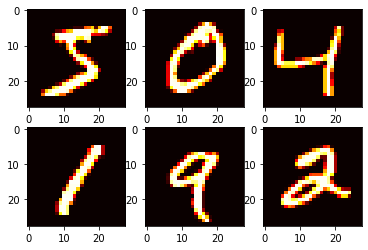

In [8]:
# visualise some mnist digits data

import matplotlib.pyplot as plt

for i in range(6):
    plt.subplot(int('23'+str(i+1)))
    plt.imshow(X_train[i],cmap=plt.get_cmap('hot'))

# Data Preprocess and Normalize

We know that all images (dataset) are represented as a 28×28 matrix containing grayscale pixel values. According to this, the dimension of the training data is (60000,28,28) but the CNN model will require one more dimension so we need to process the data by reshape the matrix to shape (60000,28,28,1).

In [9]:
#reshape format [Samples][width][height][channels]

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float')

# Converts a class vectors (integers) to binary class matrix

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

when using neural network models, It is good to perform some scaling of input values to normalize the pixel values to the range 0 and 1 by dividing each value by the maximum value (Note: The pixel values are gray scale between 0 and 255).

In [10]:
# normalize inputs

X_train = X_train / 255
X_test = X_test / 255

# 3. Create the model
Now we will create a CNN model with a double convolutional layer of the same size 3×3, max pooling layers and fully connected layers. The dropout layer is used to deactivate some of the neurons to reduce overfitting. Finally, the output layer has 10 neurons for the 10 classes. We will then compile the model with the ADAM optimizer.

In [11]:
# defining a cnn model

def model():
    num_classes = 10
    model = Sequential()
    model.add(Convolution2D(32,kernel_size=(3,3),activation='relu'))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# build the model

model = model()

# 4. Train the model
The model.fit() function of Keras takes training data, validation data, epochs, and batch size to train the model. It takes some time to train the model depending upon your working environment (CPU or GPU). After completion, we will save the model in the file named as ‘model.h5’ for later use.

In [ ]:
# fit the model

model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10,batch_size=200, verbose=2)
print("=============================================\n")
print("the model has successfully trained")

model.save('model.h5')

print("==============================================\n")
print("the model has successfully saved")

Epoch 1/10
300/300 - 138s - loss: 0.2202 - accuracy: 0.9319 - val_loss: 0.0535 - val_accuracy: 0.9819
Epoch 2/10
300/300 - 132s - loss: 0.0691 - accuracy: 0.9789 - val_loss: 0.0369 - val_accuracy: 0.9880
Epoch 3/10
300/300 - 132s - loss: 0.0511 - accuracy: 0.9838 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 4/10
300/300 - 145s - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0287 - val_accuracy: 0.9897
Epoch 5/10
300/300 - 142s - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 6/10
300/300 - 162s - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0266 - val_accuracy: 0.9924
Epoch 7/10
300/300 - 149s - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 8/10


# 5. Evaluate the model
To evaluate the performance of our model, we have 10,000 testing images of handwritten digits. The MNIST dataset is well balanced so we can get around 99% accuracy (i.e. CNN error < 1%).

In [3]:
#Evaluate the model

scores = model.evaluate(X_test,Y_test, verbose = 0)
print('===============================================\n')
print("CNN ERROR : %.2f%% " % (100-scores[1]*100))

NameError: name 'model' is not defined

In [1]:
model.summary()

NameError: name 'model' is not defined